In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.basic_optical_gating import AdaptedV as BOGV
from classes.plotter import BasicOpticalGatingPlotter as BOGP
from classes.drawer import Drawer

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sequence_src = "D:/Data/both 800fps/brightfield/*tif"
reference_src = "D:/Data/both 800fps/ref_seq.tif"
reference_period = 3.062623721828068710e+02

BOG ⚠ Subframe minima outside range -1.4685603000927285 setting to -0.5
BOG ⚠ Subframe minima outside range -1.955492758561836 setting to -0.5
BOG ⚠ Subframe minima outside range -0.5005325667942351 setting to -0.5
BOG ⚠ Subframe minima outside range 0.5060535927886977 setting to 0.5
BOG ⚠ Subframe minima outside range 1.8194122043840877 setting to 0.5
BOG ⚠ Subframe minima outside range 1.451845211297236 setting to 0.5
BOG ⚠ Subframe minima outside range -2.2258202994731437 setting to -0.5
BOG ⚠ Subframe minima outside range -1.0787932212285578 setting to -0.5
BOG ⚠ Subframe minima outside range -0.5066398831396965 setting to -0.5
BOG ⚠ Subframe minima outside range 0.5318678790686617 setting to 0.5
BOG ⚠ Subframe minima outside range 1.0743956800125543 setting to 0.5
BOG ⚠ Subframe minima outside range 2.2004752143374335 setting to 0.5
BOG ⚠ Subframe minima outside range -0.5156049045617483 setting to -0.5
BOG ⚠ Subframe minima outside range 0.5360538664342355 setting to 0.5
BOG ⚠ Su

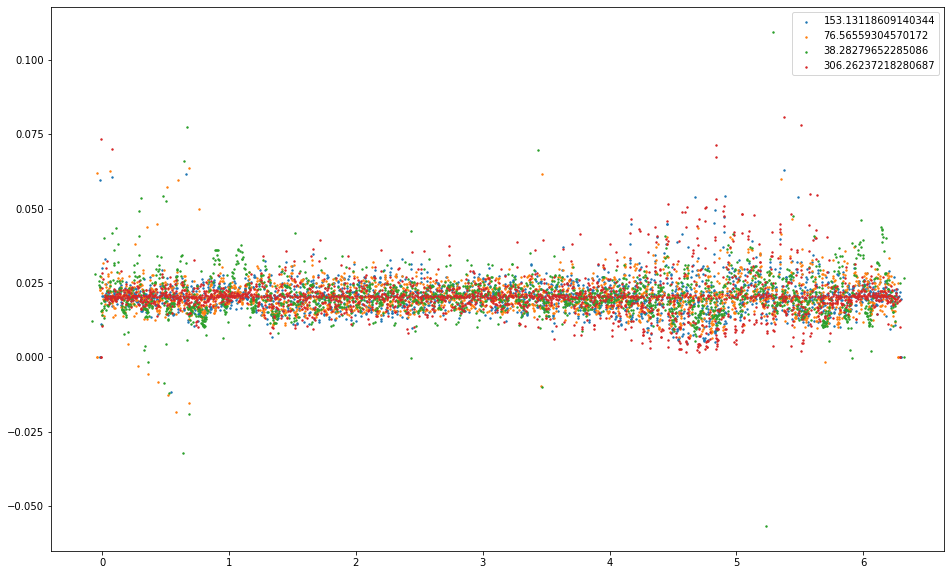

In [4]:
plt.figure(figsize = (16,10))
og_hf = BOG()
og_hf.settings["drift_correction"] = True
og_hf.set_sequence(sequence_src)
og_hf.set_reference_sequence(reference_src)
og_hf.set_reference_period(reference_period)
og_hf.reduce_reference_framerate(2)
og_hf.run()
plt.scatter(og_hf.phases[1::], og_hf.delta_phases, s = 2, label = og_hf.reference_period)

og_hf = BOG()
og_hf.settings["drift_correction"] = True
og_hf.set_sequence(sequence_src)
og_hf.set_reference_sequence(reference_src)
og_hf.set_reference_period(reference_period)
og_hf.reduce_reference_framerate(4)
og_hf.run()
plt.scatter(og_hf.phases[1::], og_hf.delta_phases, s = 2, label = og_hf.reference_period)

og_hf = BOG()
og_hf.settings["drift_correction"] = True
og_hf.set_sequence(sequence_src)
og_hf.set_reference_sequence(reference_src)
og_hf.set_reference_period(reference_period)
og_hf.reduce_reference_framerate(8)
og_hf.run()
plt.scatter(og_hf.phases[1::], og_hf.delta_phases, s = 2, label = og_hf.reference_period)

og_hf = BOG()
og_hf.settings["drift_correction"] = True
og_hf.set_sequence(sequence_src)
og_hf.set_reference_sequence(reference_src)
og_hf.set_reference_period(reference_period)
og_hf.run()
plt.scatter(og_hf.phases[1::], og_hf.delta_phases, s = 2, label = og_hf.reference_period)

plt.legend()
plt.show()

In [5]:

og_hf = BOG()
og_hf.settings["drift_correction"] = True
og_hf.set_sequence(sequence_src)
og_hf.set_reference_sequence(reference_src)
og_hf.set_reference_period(reference_period)
og_hf.reduce_reference_framerate(8)
og_hf.run()


BOG ⚠ Subframe minima outside range -0.5156049045617483 setting to -0.5
BOG ⚠ Subframe minima outside range 0.5360538664342355 setting to 0.5
BOG ⚠ Subframe minima outside range 0.7644033285947581 setting to 0.5


BOG ⚠ Minima for frame(s) [110, 422, 423] outside of the valid range.
BOG ⚠ Subframe minima outside range -0.5156049045617483 setting to -0.5
BOG ⚠ Subframe minima outside range 0.5360538664342355 setting to 0.5
BOG ⚠ Subframe minima outside range 0.7644033285947581 setting to 0.5


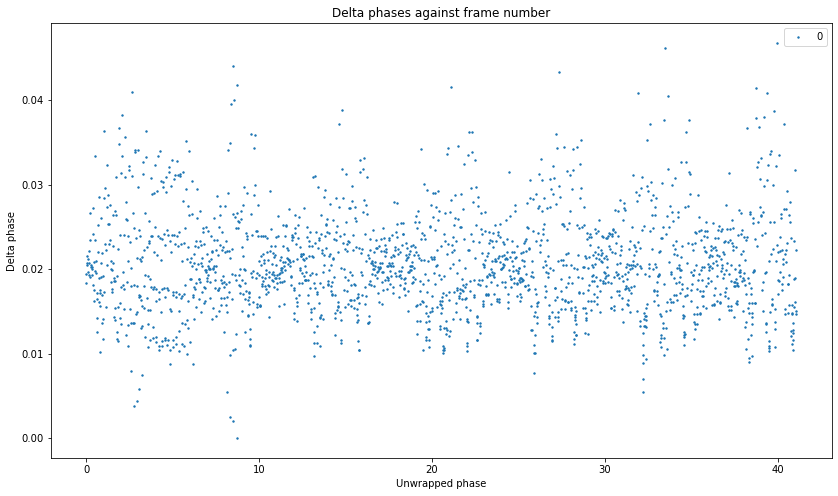

In [6]:

og_bc = BOGV()
og_bc.set_sequence(sequence_src)
og_bc.set_reference_sequence(reference_src)
og_bc.set_reference_period(reference_period)
og_bc.reduce_reference_framerate(8)
og_bc.run()

og = BOG()
og.set_sequence(sequence_src)
og.set_reference_sequence(reference_src)
og.set_reference_period(reference_period)
og.reduce_reference_framerate(8)
og.run()

bogp = BOGP([og])
bogp.plot_delta_phases()

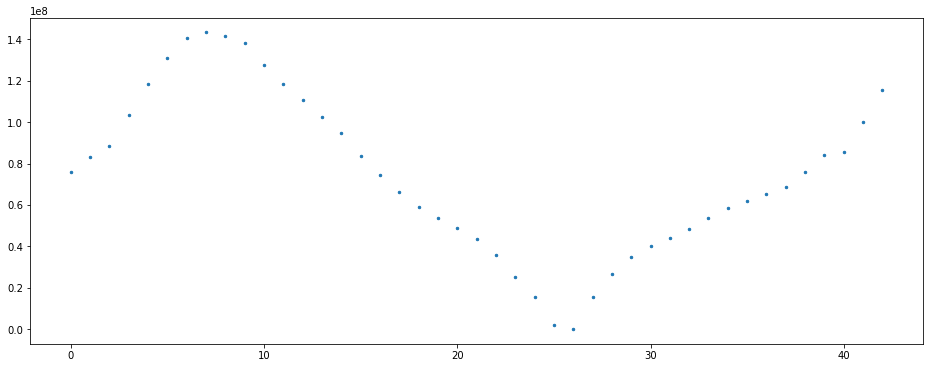

<Figure size 1152x432 with 0 Axes>

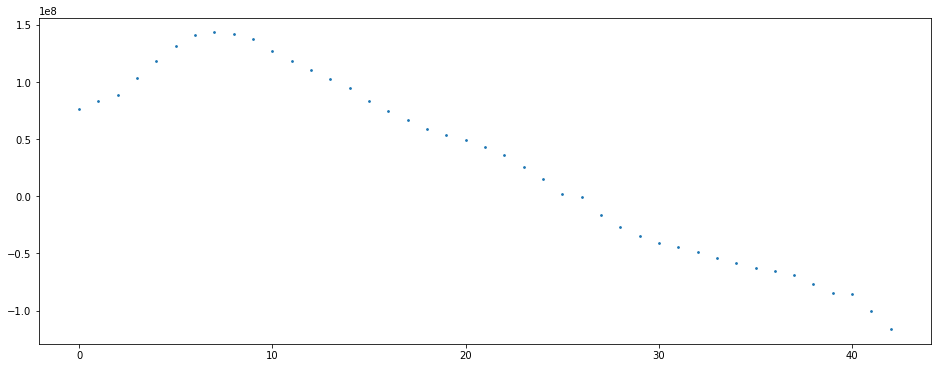

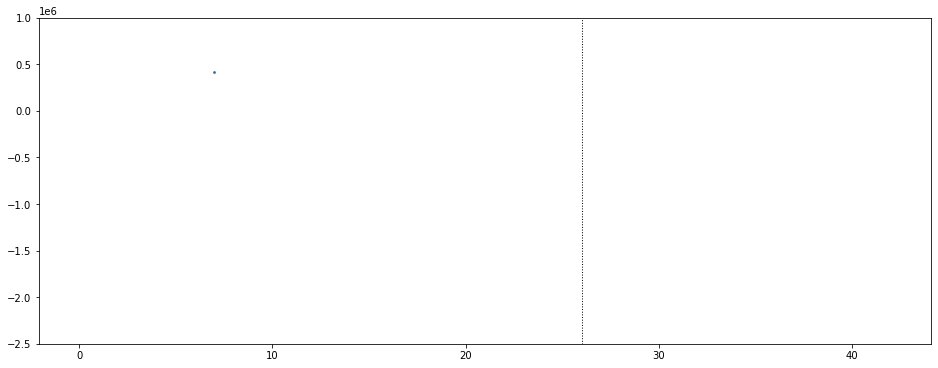

In [7]:

sad = np.array(og_hf.sads[0])
sad = sad - np.min(sad)

plt.figure(figsize = (16,6))
plt.scatter(range(len(sad)), sad, s = 6)
plt.show()

plt.figure(figsize = (16,6))
minima = np.argmin(sad)
sad[minima::] = -sad[minima::] - 500000

plt.figure(figsize = (16,6))
plt.scatter(range(sad.shape[0]),sad, s = 3)
plt.show()
plt.figure(figsize = (16,6))
plt.scatter(range(sad.shape[0]),np.gradient(sad), s = 3)
plt.axvline(minima, c = "black", ls = ":", lw = 1)
plt.ylim(-2.5e6, 1e6)
plt.show()